# Portafolios

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from pandas_datareader import data
from datetime import datetime
from scipy.optimize import minimize

In [ ]:
import sys
sys.path.append("../")

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
plt.style.use("seaborn-dark")

In [ ]:
## Módulo Finanzas
import yfinance as yf

class Asset:
    def __init__(self, ticker, start_date,
                 end_date):
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date

    def get_data(self):
        df = yf.download(self.ticker, start = self.start_date, end = self.end_date)
        return df

    def  simple_returns(self, adj = False, cum = False):
        df = self.get_data()
        if adj:
            simple_returns = df["Adj Close"].pct_change().dropna()
        else:
            simple_returns = df["Close"].pct_change().dropna()
        if cum:
            simple_returns = (1 + simple_returns).cumprod() - 1
        return simple_returns

## Modern portfolio theory (MPT)

The **Modern portfolio theory (MPT)** is a mathematical framework **for assembling a portfolio of assets such that the expected return is maximized for a given level of volatility**. It is a formalization of **diversification in investing**, i.e., the idea that owning different kinds of financial assets is less risky than owning one signgle asset.

### Efficient Frontiers

In the MPT, the **efficient frontier** is a curve denoting the **efficient** part of the **volatility-return plane**.
Formally, it is the set of portfolios that can be constructed with the given input assets
that have the maximum expected returns for a fixed level of volatility and, in turn,
the lowest volatilities for a fixed level of expected return. The efficient frontier was first formulated by **Harry Markowitz** (1952).

We have to construct a portfolio of several assets and **we want to find the optimal percentages of investment to be allocated in these assets** so that, for example, the total (expected) return of such a portfolio is maximixed for a given level of volatility.

Suppose **we have $N > 1$ stocks** and we decide to invest our capital in them.
Let $\mathbf{w}:=(w_1,\dots,w_N)^T$, with $w_i\in (0,1)$ for all $i=1,\dots,N$,
where each $w_i$ represents the proportion of the investiment
(a percentage of the capital invested) in asset $i$.
These quantities $w_i$ are the **weights**.

Since we invest all of our capital, there holds $\sum_{i=1}^N w_i = 1$ (this is a **long-only** strategy).

Let $R_i$ and $R_p$ be the return of asset $i$ and the total return of the portfolio, respectively.
Likewise, let $\sigma_i$ and $\sigma_p$ be the volatility of asset $i$ and the volatility of the portfolio, respectively.


### Return of a portfolio
The **total return of the porfolio** is going to be a simple weigthed average of the (total) returns of single assets, i.e.,
$$
R_p = \sum_{i=1}^N w_i R_i = \mathbf{w}^T \mathbf{R},
$$
where $\mathbf{R} := (R_1,\dots,R_N)^T$.
Note that if we have a dataset of **past returns**, the total return $R_p$ is computed as above using the returns of the past data. On the other hand, if we are going to invest now, we do not have a series of true (past) return, but we instead would have **expected returns**. Hence, in this case we would have the maean value $\mathbb{E}$ in the formula above.


### Volatility of a portfolio
The **volatility of the porfolio** is computed as the (square root of the) variance of the weigthed sum of the returns of single assets.

Let us consider an example with only two assets.
We have $w_1$ and $w_2$ and two assets whose returns are $R_1$ and $R_2$. We have:
$$
\sigma_p^2 =   \text{Var}(w_1 R_1 + w_2 R_2) =
w_1^2 \text{Var}(R_1) + w_2^2\text{Var}(R_2) + 2w_1 w_2\text{Cov}(R_1,R_2) =
w_1^2 \sigma_1^2 + w_2^2\sigma_2^2 + 2w_1 w_2\text{Cov}(R_1,R_2),
$$
where
$$
\text{Cov}(R_1,R_2) := \mathbb{E}[(R_1-\mu_1)(R_2 - \mu_2)],
$$
is the **covariance** between the two assets and $\mu_i$ and $\mu_j$ denote
their mean returns, respectively. In particular, if we let
$$
\rho_{1,2} := \frac{\text{Cov}(R_1,R_2)}{\sigma_1 \sigma_2},
$$
denote the **correlation coefficient** between the assets,
then the volatility of a $2$ assets portfolio becomes:
$$
\sigma_p =
\sqrt{ w_1^2 \sigma_1^2 + w_2^2 \sigma_2^2 + 2w_1 w_2 \sigma_1 \sigma_2 \rho_{1,2} }.
$$
Note that, using matrix notation, we can write in compact form such a volatility. That is:
$$
\sigma_p =
\sqrt{
(w_1, w_2)\,
\begin{pmatrix}
\sigma^2_1 & \sigma_1 \sigma_2 \rho_{12} \\
\sigma_1 \sigma_2 \rho_{21} & \sigma^2_2
\end{pmatrix}
\begin{pmatrix}
w_1 \\
w_2
\end{pmatrix}
}
=
\sqrt{
\mathbf{w}^T \Sigma \mathbf{w}
}
\quad\text{and}\quad
\Sigma :=
\begin{pmatrix}
\sigma^2_1 & \sigma_1 \sigma_2 \rho_{12} \\
\sigma_1 \sigma_2 \rho_{21} & \sigma^2_2
\end{pmatrix},
$$
where $\Sigma$ is the symmetric square **covariance matrix**.


Now, in case of $N$ stocks, let again $\Sigma = [c_{ij}]$
be the $N\times N$ covariance matrix
where each element $c_{ij} := \sigma_i \sigma_j \rho_{ij}$, for $i,j=1,\dots,N$,
denotes the **covariance** between assets $i$
and asset $j$,
and with $\sigma_i$, $\sigma_j$, and $\rho_{ij}$ being the volatilities
and the correlation coefficients of assets $i$ and $j$, respectively.
Of course, when $i=j$, $c_{ii}=\sigma_i^2$ is simply the variance of asset $i$
(these are the diagonal entries of the covariance matrix).

The volatility of the portfolio is then given by:
$$
\sigma_p = \sqrt{ \mathbf{w}^T \Sigma \mathbf{w} }.
$$


### Efficient frontiers of 2-assets portfolios
In the following, we propose an artificial example in order to see the curve that is drawn by different portfolios which
are constructed with only $2$ assets with different correlation $\rho_{12}$.
First of all, we assume to generate $500$ **daily returns** of $2$ assets:

In [ ]:
nret             = 500
periods_per_year = 252
risk_free_rate   = 0.0

Then, we set up a value for the means and the volatility of our two artifical assets:

In [ ]:
mean_1 = 0.001019
mean_2 = 0.001249
vol_1  = 0.016317
vol_2  = 0.019129

and we set up $6$ correlations of the two assets, and for every fixed correlation,
we will generate $20$ portfolios by allocating $20$ pairs of weights:

In [ ]:
rhos  = np.linspace(1,-1,num=6)
ncorr = len(rhos)

nweig = 20
w1 = np.linspace(0,1,num=nweig)
w2 = 1 - np.linspace(0,1,num=nweig)
ww = pd.DataFrame( [w1, w2] ).T

In [ ]:
def annualize_rets(s, periods_per_year):
    '''
     Calcula el rendimiento por año o rendimiento anualizado.
     La variable period_per_year puede ser, por ejemplo, 12, 52, 252, en
     caso de datos mensuales, semanales y diarios.
     El método toma como entrada un DataFrame o una Serie y, en el primero
     En este caso, calcula el rendimiento anualizado para cada columna (Serie) utilizando pd.aggregate
    '''
    if isinstance(s, pd.DataFrame):
        return s.aggregate( annualize_rets, periods_per_year=periods_per_year )
    elif isinstance(s, pd.Series):
        growth = (1 + s).prod()
        n_period_growth = s.shape[0]
        return growth**(periods_per_year/n_period_growth) - 1

In [ ]:
def annualize_vol(s, periods_per_year, ddof=1):
    '''
    Calcula la volatilidad por año o la volatilidad anualizada.
    La variable period_per_year puede ser, por ejemplo, 12, 52, 252, en
    caso de datos mensuales, semanales y diarios.
    El método toma como entrada un DataFrame, una Serie, una lista o un solo número.
    En el primer caso, calcula la volatilidad anualizada de cada columna.
    (Serie) mediante el uso de pd.aggregate. En el último caso, s es una volatilidad
    calculado de antemano, por lo tanto sólo se realiza la anulación
    '''
    if isinstance(s, pd.DataFrame):
        return s.aggregate(annualize_vol, periods_per_year=periods_per_year )
    elif isinstance(s, pd.Series):
        return s.std(ddof=ddof) * (periods_per_year)**(0.5)
    elif isinstance(s, list):
        return np.std(s, ddof=ddof) * (periods_per_year)**(0.5)
    elif isinstance(s, (int,float)):
        return s * (periods_per_year)**(0.5)

In [ ]:
def portfolio_return(weights, vec_returns):
    '''
    Calcula el rendimiento de un portafolio.
    Toma como entrada un vector de fila de pesos (lista de np.array)
    y un vector de columna (o pd.Series) de rendimientos
    '''
    return np.dot(weights, vec_returns)

In [ ]:
def portfolio_volatility(weights, cov_rets):
    '''
    Calcula la volatilidad de un portafolio.
    Toma como entrada un vector de pesos (np.array o pd.Series)
    y la matriz de covarianza de los rendimientos de los activos de la cartera
    '''
    return ( np.dot(weights.T, np.dot(cov_rets, weights)) )**(0.5)

In [ ]:
def sharpe_ratio(s, risk_free_rate, periods_per_year, v=None):
    '''
     Calcula el ratio de Sharpe anualizado.
     La variable period_per_year puede ser, por ejemplo, 12, 52, 252, en el caso de datos anuales, semanales y diarios.
     La variable tasa_libre_riesgo es la anual.
     El método toma como entrada un DataFrame, una Serie o un solo número.
     En el primer caso, calcula el ratio de Sharpe anualizado de cada columna (Serie) utilizando pd.aggregate.
     En el último caso, s es el rendimiento (ya anualizado) y v es la volatilidad (ya anualizada)
     calculado de antemano, por ejemplo, en el caso de una cartera.
    '''
    if isinstance(s, pd.DataFrame):
        return s.aggregate( sharpe_ratio, risk_free_rate=risk_free_rate, periods_per_year=periods_per_year, v=None)
    elif isinstance(s, pd.Series):
        # convertir la tasa libre de riesgo anual al período suponiendo que:
        # RFR_year = (1+RFR_period)^{periods_per_year} - 1.
        rf_to_period = (1 + risk_free_rate)**(1/periods_per_year) - 1
        excess_return = s - rf_to_period
        # anualizamos el excess return
        ann_ex_rets = annualize_rets(excess_return, periods_per_year)
        # Volatilidad anualizada
        ann_vol = annualize_vol(s, periods_per_year)
        return ann_ex_rets / ann_vol
    elif isinstance(s, (int,float)) and v is not None:
       # Portafolio: se supone que s es el único (ya anualizado)
        # retorno de la cartera y v es la volatilidad única (ya anualizada).
        return (s - risk_free_rate) / v

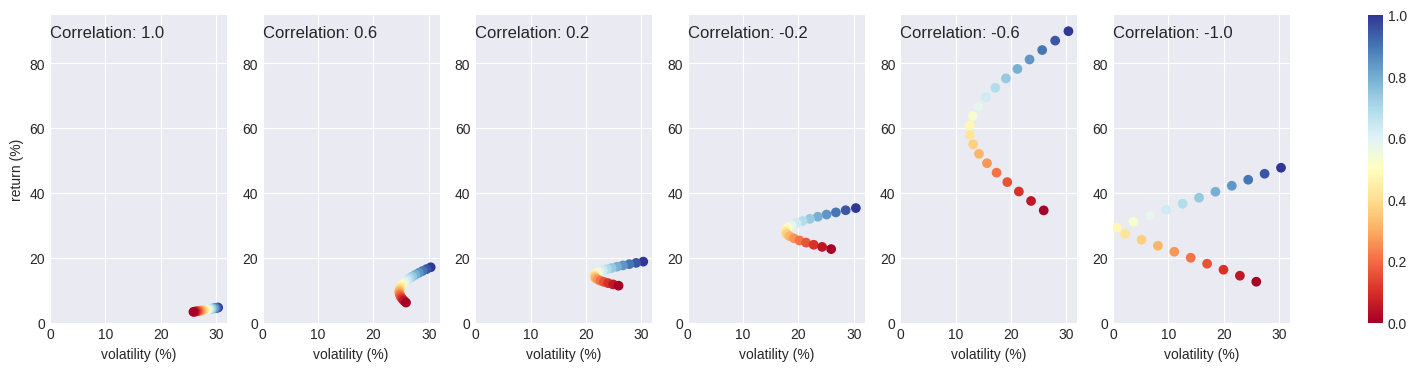

In [ ]:
np.random.seed(1)

fig, ax = plt.subplots(1,6, figsize=(20,4))
ax = ax.flatten()

for k_rho, rho in enumerate(rhos):
    #
    portfolio = pd.DataFrame(columns=["return","volatility","sharpe ratio"])


    cov_ij     = rho * vol_1 * vol_2
    cov_rets   = pd.DataFrame( [[vol_1**2, cov_ij], [cov_ij, vol_2**2]] )
    daily_rets = pd.DataFrame( np.random.multivariate_normal((mean_1,mean_2), cov_rets.values, nret) )

    for i in range(ww.shape[0]):

        weights = ww.loc[i]



        ann_rets      = annualize_rets(daily_rets, periods_per_year)
        portfolio_ret = portfolio_return(weights, ann_rets)


        portfolio_vol = portfolio_volatility(weights, cov_rets)
        portfolio_vol = annualize_vol(portfolio_vol, periods_per_year)


        portfolio_spr = sharpe_ratio(portfolio_ret, risk_free_rate, periods_per_year, v=portfolio_vol)


        portfolio = portfolio.append( {"return":portfolio_ret, "volatility": portfolio_vol, "sharpe ratio":portfolio_spr}, ignore_index=True)


    im = ax[k_rho].scatter(portfolio["volatility"]*100, portfolio["return"]*100, c=w2, cmap='RdYlBu')
    ax[k_rho].grid()
    ax[k_rho].set_title("Correlation: {}".format(np.round(rho,2)), y=0.9, loc='left')
    ax[k_rho].set_xlabel("volatility (%)")
    if k_rho==0: ax[k_rho].set_ylabel("return (%)")
    ax[k_rho].set_xlim([0,32])
    ax[k_rho].set_ylim([0,95])

fig.colorbar(im, ax=ax.ravel().tolist())
plt.show()

For any given correlation, each point represents the pair (return, volatility) of a portfolio constructed with some percentage allocation.
This can be seen in the colorbar: **red corresponds to $\mathbf{w} = (1,0)$**, i.e., allocation of money only to the first asset, whereas
**blue corresponds to $\mathbf{w} = (0,1)$**, i.e., allocation of money only ot the second asset.  

We can see that **the lower the correlation between the assets, the better the trade-off between return and volatility**: in this example,
when $\rho=-1$, we could in principle construct a portfolio which guarantees about $30\%$ of return with almost no volatility.

### Example from the real world: US stocks
Now we will get the timeseries of some US economy stocks and see how to construct a portfolio in an efficient way.

In [ ]:
ticker  = ['AMZN','KO','MSFT']
asset = Asset(ticker,start_date="2011-1-1", end_date="2019-1-1")

stocks = asset.get_data()["Adj Close"]

stocks

[*********************100%%**********************]  3 of 3 completed


,AMZN,KO,MSFT
Date,,,
2011-01-03,9.211000,21.990650,21.708206
2011-01-04,9.250500,21.535463,21.793550
2011-01-05,9.371000,21.407341,21.723722
2011-01-06,9.293000,21.252237,22.359919
2011-01-07,9.274500,21.215153,22.189234
...,...,...,...
2018-12-24,67.197998,39.630630,89.566986
2018-12-26,73.544998,40.475666,95.685310
2018-12-27,73.082001,40.984417,96.275253


In [ ]:
def compute_returns(s):
    '''
    Calcula los rendimientos (cambio porcentual) de un marco de datos de serie.
    En el primer caso, calcula los rendimientos de cada columna (Serie) utilizando pd.aggregate
    '''
    if isinstance(s, pd.DataFrame):
        return s.aggregate( compute_returns )
    elif isinstance(s, pd.Series):
        return s / s.shift(1) - 1
    else:
        raise TypeError("Se espera pd.DataFrame o pd.Series")

In [ ]:
daily_rets = compute_returns(stocks)
daily_rets

,AMZN,KO,MSFT
Date,,,
2011-01-03,NaN,NaN,NaN
2011-01-04,0.004288,-0.020699,0.003931
2011-01-05,0.013026,-0.005949,-0.003204
2011-01-06,-0.008324,-0.007245,0.029286
2011-01-07,-0.001991,-0.001745,-0.007634
...,...,...,...
2018-12-24,-0.024313,-0.033845,-0.041739
2018-12-26,0.094452,0.021323,0.068310
2018-12-27,-0.006295,0.012569,0.006165


In [ ]:
ann_rets = annualize_rets(daily_rets, 252)
round(ann_rets,2)

AMZN    0.30
KO      0.08
MSFT    0.21
dtype: float64

In [ ]:
mean_rets = daily_rets.mean()
std_rets  = daily_rets.std()
cov_rets  = daily_rets.cov()
cov_rets

,AMZN,KO,MSFT
AMZN,0.000397,0.000047,0.000137
KO,0.000047,0.000082,0.000049
MSFT,0.000137,0.000049,0.000213


Now we simulate $4000$ portfolios with weights allocated to the stocks above:

In [ ]:
periods_per_year = 252
num_portfolios   = 4000
portfolios       = pd.DataFrame(columns=["return","volatility","sharpe ratio","w1","w2","w3"])
risk_free_rate   = 0

In [ ]:
for i in range(num_portfolios):

    weights = np.random.random(3)

    weights /= np.sum(weights)


    portfolio_ret = portfolio_return(weights, ann_rets)


    portfolio_vol = portfolio_volatility(weights, cov_rets)
    portfolio_vol = annualize_vol(portfolio_vol, periods_per_year)


    portfolio_spr = sharpe_ratio(portfolio_ret, risk_free_rate, periods_per_year, v=portfolio_vol)


    portfolios = portfolios.append( {"return":portfolio_ret,
                                     "volatility":portfolio_vol,
                                     "sharpe ratio":portfolio_spr,
                                     "w1": weights[0], "w2": weights[1], "w3": weights[2]},
                                     ignore_index=True)

In [ ]:
portfolios.tail()

,return,volatility,sharpe ratio,w1,w2,w3
3995,0.200281,0.184067,1.088091,0.343689,0.303920,0.352390
3996,0.234731,0.220465,1.064712,0.555753,0.189433,0.254813
3997,0.157497,0.153272,1.027565,0.172563,0.516094,0.311344
3998,0.241884,0.236865,1.021191,0.675339,0.222990,0.101672
3999,0.194682,0.180953,1.075867,0.386835,0.381419,0.231746
